In [1]:
import os
os.chdir('/repos/social_capital_in_trade_networks/')

In [2]:
import networkx as nx
from src.utils.utils_networks import favor_centrality
import matplotlib.pyplot as plt
import os
from pathlib import Path
from itertools import count

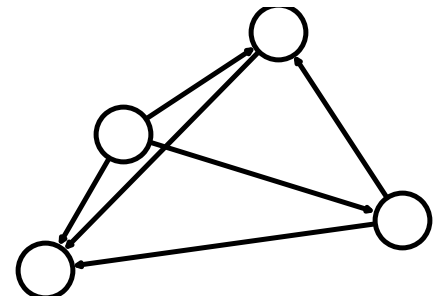

In [3]:
G = nx.DiGraph()
G.add_edges_from([('1', '2'), ('1', '3'), ('1','4'), ('2','3'), ('4','2'), ('4','3')])

h,a=nx.hits(G, max_iter=750)
f = favor_centrality(G)
f_t = favor_centrality(G, transpose=True)

h = {k:{'hubs':v} for k,v in h.items()}
a = {k:{'authorities':v} for k,v in a.items()}
f = {k:{'out_favor':v} for k,v in f.items()}
f_t = {k:{'in_favor':v} for k,v in f_t.items()}

nx.set_node_attributes(G, h)
nx.set_node_attributes(G, a)
nx.set_node_attributes(G, f)
nx.set_node_attributes(G, f_t)

# Simple plot
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

nx.draw(G, **options)

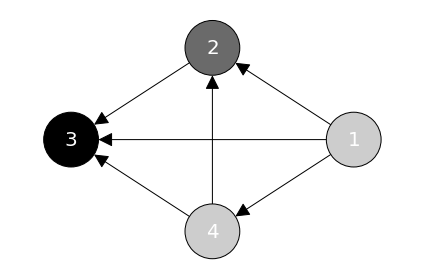

In [4]:
import matplotlib as mpl
import numpy as np

cmap = mpl.cm.Greys(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[30:,:-1])

def plot_graph_by_node_property(p):
    # get unique groups
    node_values = nx.get_node_attributes(G,p)
    groups = set(node_values.values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[node_values[n]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.circular_layout(G)
    size = 3000
    ec = nx.draw_networkx_edges(G, pos, alpha=1, node_size=size, arrowstyle='-|>', arrowsize=30)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, 
                                with_labels=True, node_size=size, cmap=cmap, edgecolors='k')
    labels = nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=20)

    #plt.colorbar(nc)
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

plot_graph_by_node_property(p='in_favor')
plt.tight_layout()
save_to = os.path.join('reports', 'figures', f'toy_mode_in_favor_capital.png')
plt.savefig(save_to)    
plt.show()

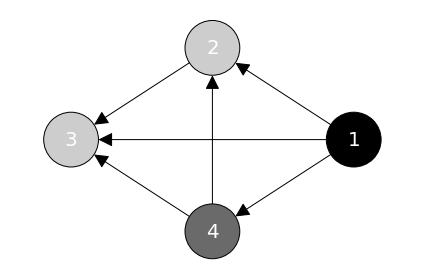

In [5]:
plot_graph_by_node_property(p='out_favor')
plt.tight_layout()
save_to = os.path.join('reports', 'figures', f'toy_mode_out_favor_capital.png')
plt.savefig(save_to)    
plt.show()

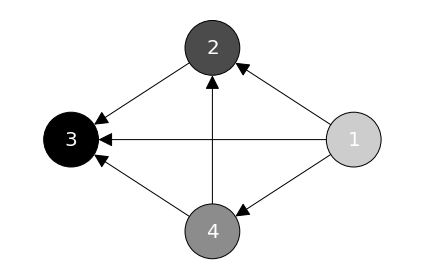

In [6]:
plot_graph_by_node_property(p='authorities')
plt.tight_layout()
save_to = os.path.join('reports', 'figures', f'toy_mode_in_info_capital.png')
plt.savefig(save_to)    
plt.show()

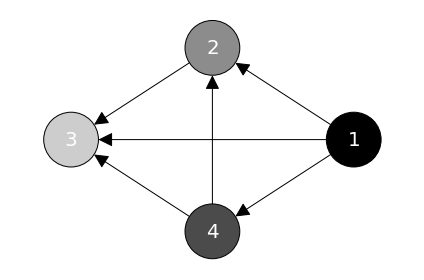

In [7]:
plot_graph_by_node_property(p='hubs')
plt.tight_layout()
save_to = os.path.join('reports', 'figures', f'toy_mode_out_info_capital.png')
plt.savefig(save_to)    
plt.show()